In [9]:
import re
import glob
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [10]:
S = ["10", "20", "50", "100"]
T = ["0.1", "0.3", "0.5"]
# T = ["0.1", "0.3", "0.5", "0.7", "0.9"]
M = ["0.3", "null"]

In [11]:
# my_col = {"H_0-0.1": "#fec44f", "H_0-0.3": "#fe9929", "H_0-0.5": "#ec7014", "H_0-0.7": "#cc4c02", "H_0-0.9": "#8c2d04", "scVAEIT": "#958c8c"}
my_col = {"MINERVA": "#FA7F6F", "MIDAS": "#BEB8DC"}
# my_order = ["MIDAS", "H_0-0.1", "H_0-0.3", "H_0-0.5", "H_0-0.7", "H_0-0.9"]

In [12]:
# data_rna = {}

# for s in S:
#     data_rna["Subset " + s + "%"] = {}
#     for t in T:
#         data_rna["Subset " + s + "%"][str(int(float(t) * 100)) + "% of gene features missing"] = {}
#         for m in M:
#             if m != "null":
#                 # data_rna_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + "mask_" + m + "_fmask_" + t + "/RMSLE_rna.csv"
#                 data_rna_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + "mask_" + m + "_fmask_" + t + "/pearson_rna.csv"
#                 data_rna["Subset " + s + "%"][str(int(float(t) * 100)) + "% of gene features missing"]["H"] = data_rna_name
#             else:
#                 data_rna_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + m + "_fmask_" + t + "/pearson_rna.csv"
#                 # data_rna_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + m + "_fmask_" + t + "/RMSLE_rna.csv"
#                 data_rna["Subset " + s + "%"][str(int(float(t) * 100)) + "% of gene features missing"]["MIDAS"] = data_rna_name
#         # data_rna_name = "/root/workspace/sjh/code/Compare/scVAEIT/result/dm_sub" + s + "_test/predict_test_" + t + "/res_scVAEIT_RNA.csv"
#         # data_rna["Subset " + s + "%"][str(int(float(m) * 100)) + "% of gene features missing"]["scVAEIT"] = data_rna_name

# print(data_rna)

In [13]:
# dfs = []

# for subset, subset_data in data_rna.items():
#     for test_mask, test_mask_data in subset_data.items():
#         for mask_key, csv_file in test_mask_data.items():
#             df = pd.read_csv(csv_file, header = None).transpose()
#             df.columns = ["RMSLE_rna"]
#             df['Model'] = mask_key
#             df['Subset'] = subset
#             df['Test_mask'] = test_mask
#             dfs.append(df)

# combined_df_rna = pd.concat(dfs, ignore_index=True)

In [14]:
# fig, axs = plt.subplots(3, 2, figsize = (12, 5))
# fig.subplots_adjust(wspace = 0.1)

# l = 0
# w = 0

# for i in T:
#     t = str(int(float(i) * 100))
#     ax_sub = sns.violinplot(combined_df[(combined_df['Test_mask'] == (t + "% of gene features missing"))], hue = 'Model', y = 'RMSE_rna', x = 'Subset', 
#                             linewidth = 0.3, width = 0.8, palette = my_col, hue_order = my_order, ax = axs[l][w])
#     for spine in ['top', 'right']:
#         ax_sub.spines[spine].set_color('none')
    
#     ax_sub.tick_params(axis = 'x', direction = 'in')
#     ax_sub.tick_params(labelsize = 7, axis = 'both')
#     ax_sub.set_xlabel('')
#     ax_sub.set_ylabel('')

#     if t == "0":
#         ax_sub.set_title("None gene features missing", fontsize = 8, fontweight = 'bold')
#     else:
#         ax_sub.set_title(t + "% of gene features missing", fontsize = 8, fontweight = 'bold')
    
#     if l != 2:
#         ax_sub.set_xticklabels('')

#     if l == 0 and w == 1:
#         ax_sub.legend(loc = (0.38, 0.68), ncol = 3, frameon = False, fontsize  = 8)
#     else:
#         ax_sub.legend('', frameon = False)
#     if w == 0:
#         w = 1
#     elif w == 1:
#         l += 1
#         w = 0

# plt.savefig('figure6_1.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

In [15]:
data_adt = {}

for s in S:
    data_adt["Subset " + s + "%"] = {}
    for t in T:
        data_adt["Subset " + s + "%"][str(int(float(t) * 100)) + "% of protein features missing"] = {}
        for m in M:
            if m != "null":
                data_adt_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + "mask_" + m + "_fmask_" + t + "/RMSLE_adt.csv"
                # data_adt_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + "mask_" + m + "_fmask_" + t + "/pearson_adt.csv"
                data_adt["Subset " + s + "%"][str(int(float(t) * 100)) + "% of protein features missing"]["MINERVA"] = data_adt_name
            else:
                data_adt_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + m + "_fmask_" + t + "/RMSLE_adt.csv"
                # data_adt_name = "/root/workspace/sjh/data/paper/result/comparison/dm_sub" + s + "/" + m + "_fmask_" + t + "/pearson_adt.csv"
                data_adt["Subset " + s + "%"][str(int(float(t) * 100)) + "% of protein features missing"]["MIDAS"] = data_adt_name
        # data_adt_name = "/root/workspace/sjh/code/Compare/scVAEIT/result/dm_sub" + s + "_test/predict_test_" + t + "/res_scVAEIT_ADT.csv"
        # data_adt["Subset " + s + "%"][str(int(float(m) * 100)) + "% of gene features missing"]["scVAEIT"] = data_adt_name

print(data_adt)

{'Subset 10%': {'10% of protein features missing': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/mask_0.3_fmask_0.1/RMSLE_adt.csv', 'MIDAS': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/null_fmask_0.1/RMSLE_adt.csv'}, '30% of protein features missing': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/mask_0.3_fmask_0.3/RMSLE_adt.csv', 'MIDAS': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/null_fmask_0.3/RMSLE_adt.csv'}, '50% of protein features missing': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/mask_0.3_fmask_0.5/RMSLE_adt.csv', 'MIDAS': '/root/workspace/sjh/data/paper/result/comparison/dm_sub10/null_fmask_0.5/RMSLE_adt.csv'}}, 'Subset 20%': {'10% of protein features missing': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/dm_sub20/mask_0.3_fmask_0.1/RMSLE_adt.csv', 'MIDAS': '/root/workspace/sjh/data/paper/result/comparison/dm_sub20/null_fmask_0.1/RMSLE_adt.csv'}, '30%

In [16]:
dfs = []

for subset, subset_data in data_adt.items():
    for test_mask, test_mask_data in subset_data.items():
        for mask_key, csv_file in test_mask_data.items():
            df = pd.read_csv(csv_file, header = None).transpose()
            df.columns = ["RMSLE_adt"]
            df['Model'] = mask_key
            df['Subset'] = subset
            df['Test_mask'] = test_mask
            dfs.append(df)

combined_df_adt = pd.concat(dfs, ignore_index=True)


In [17]:
# fig, axs = plt.subplots(3, 2, figsize = (12, 5))
# fig.subplots_adjust(wspace = 0.1)

# l = 0
# w = 0

# for i in T:
#     t = str(int(float(i) * 100))
#     ax_sub = sns.violinplot(combined_df[(combined_df['Test_mask'] == (t + "% of protein features missing"))], hue = 'Model', y = 'RMSLE_adt', x = 'Subset', linewidth = 0.3, width = 0.8,
#                         palette = my_col, hue_order = my_order, ax = axs[l][w])
#     for spine in ['top', 'right']:
#         ax_sub.spines[spine].set_color('none')
    
#     ax_sub.tick_params(axis = 'x', direction = 'in')
#     ax_sub.tick_params(labelsize = 7, axis = 'both')
#     ax_sub.set_xlabel('')
#     ax_sub.set_ylabel('')

#     if t == "0":
#         ax_sub.set_title("None protein features missing", fontsize = 8, fontweight = 'bold')
#     else:
#         ax_sub.set_title(t + "% of protein features missing", fontsize = 8, fontweight = 'bold')
    
#     if l != 2:
#         ax_sub.set_xticklabels('')

#     if l == 0 and w == 1:
#         ax_sub.legend(loc = (0.38, 0.68), ncol = 3, frameon = False, fontsize  = 8)
#     else:
#         ax_sub.legend('', frameon = False)
#     if w == 0:
#         w = 1
#     elif w == 1:
#         l += 1
#         w = 0

# plt.savefig('figure6_2.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

In [18]:
# combined_df_sub = combined_df[((combined_df['Model'] == 'MIDAS') | (combined_df['Model'] == 'H'))]
# combined_df_sub['Test_mask'] = combined_df_sub['Test_mask'].str.replace(r'\b0% of\b', 'None ', regex = True)

In [19]:
# ax_sub = sns.catplot(combined_df_rna, hue = 'Model', y = 'RMSLE_rna', x = 'Subset', split = True, kind = "violin", col = "Test_mask", inner = "quartile", 
#                         linewidth = 1.5, width = 0.8, palette = my_col, legend = False)
# (ax_sub.set_axis_labels('', "RMSLE_rna")
#        .set_titles("{col_name}", fontsize = 8, fontweight = 'bold'))
# plt.legend(loc = 'upper right', frameon = False)
# plt.savefig('figure6_1.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

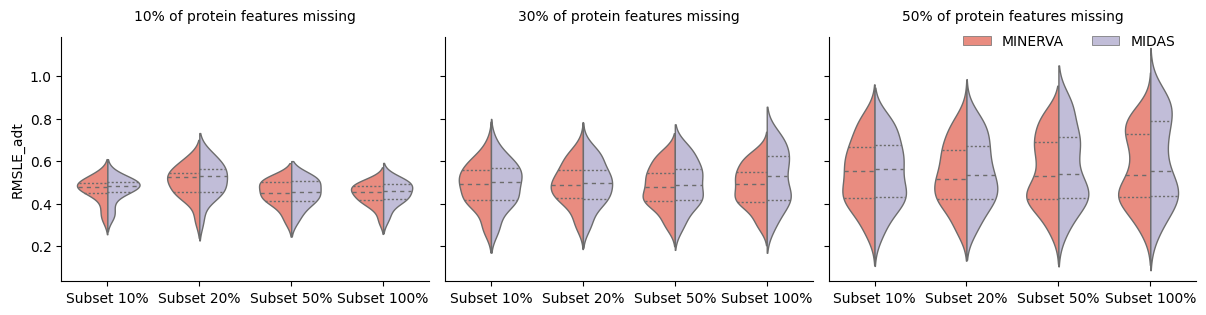

In [20]:
ax_sub = sns.catplot(combined_df_adt, hue = 'Model', y = 'RMSLE_adt', x = 'Subset', split = True, kind = "violin", col = "Test_mask", inner = "quartile", 
                        linewidth = 1., width = 0.7, palette = my_col, legend = False)
(ax_sub.set_axis_labels('', "RMSLE_adt")
       .set_xticklabels(fontsize = 10)
       .set_titles("{col_name}", pad = 12, fontsize = 12))
ax_sub.figure.set_size_inches(12, 3)
plt.legend(loc = (0.35, 0.93), ncol = 2, frameon = False)
plt.savefig('figure6_2.svg', dpi = 300, bbox_inches = 'tight', pad_inches = 0)